In [46]:
import pandas as pd  
import numpy as np 
import matplotlib.pyplot as plt  
import seaborn as sns 

from sklearn.model_selection import train_test_split    #algorithm divides the data, the train part and the test part.    

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn import metrics #Import scikit-learn metrics module for accuracy

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, recall_score, f1_score
from sklearn.metrics import classification_report

import warnings
warnings.filterwarnings('ignore')

In [47]:
data= pd.read_csv(r"C:\Users\Omar Elqady\project_of_data_science\diabetes.csv")
data

,id,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,...,citoglipton,insulin,glyburide.metformin,glipizide.metformin,glimepiride.pioglitazone,metformin.rosiglitazone,metformin.pioglitazone,change,diabetesMed,readmitted
0,1,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,...,No,No,No,No,No,No,No,No,No,NO
1,2,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,3,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,...,No,No,No,No,No,No,No,No,Yes,NO
3,4,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,5,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,101762,443847548,100162476,AfricanAmerican,Male,[70-80),?,1,3,7,...,No,Down,No,No,No,No,No,Ch,Yes,>30
101762,101763,443847782,74694222,AfricanAmerican,Female,[80-90),?,1,4,5,...,No,Steady,No,No,No,No,No,No,Yes,NO
101763,101764,443854148,41088789,Caucasian,Male,[70-80),?,1,1,7,...,No,Down,No,No,No,No,No,Ch,Yes,NO
101764,101765,443857166,31693671,Caucasian,Female,[80-90),?,2,3,7,...,No,Up,No,No,No,No,No,Ch,Yes,NO


In [48]:
print("dimention of data is : ",data.shape)    # dimensions of Data


dimention of data is :  (101766, 51)


In [49]:
print("info of data is : ",data.info())    # # Display all information about columns on the dataset



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 51 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   id                        101766 non-null  int64 
 1   encounter_id              101766 non-null  int64 
 2   patient_nbr               101766 non-null  int64 
 3   race                      101766 non-null  object
 4   gender                    101766 non-null  object
 5   age                       101766 non-null  object
 6   weight                    101766 non-null  object
 7   admission_type_id         101766 non-null  int64 
 8   discharge_disposition_id  101766 non-null  int64 
 9   admission_source_id       101766 non-null  int64 
 10  time_in_hospital          101766 non-null  int64 
 11  payer_code                101766 non-null  object
 12  medical_specialty         101766 non-null  object
 13  num_lab_procedures        101766 non-null  int64 
 14  num_

In [50]:
data.head(10)   # # First Ten Rows Of Data


,id,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,...,citoglipton,insulin,glyburide.metformin,glipizide.metformin,glimepiride.pioglitazone,metformin.rosiglitazone,metformin.pioglitazone,change,diabetesMed,readmitted
0,1,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,...,No,No,No,No,No,No,No,No,No,NO
1,2,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,3,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,...,No,No,No,No,No,No,No,No,Yes,NO
3,4,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,5,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
5,6,35754,82637451,Caucasian,Male,[50-60),?,2,1,2,...,No,Steady,No,No,No,No,No,No,Yes,>30
6,7,55842,84259809,Caucasian,Male,[60-70),?,3,1,2,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
7,8,63768,114882984,Caucasian,Male,[70-80),?,1,1,7,...,No,No,No,No,No,No,No,No,Yes,>30
8,9,12522,48330783,Caucasian,Female,[80-90),?,2,1,4,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
9,10,15738,63555939,Caucasian,Female,[90-100),?,3,3,4,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


# Data Cleaning


In [51]:
data.isnull()    #Search About null colume

,id,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,...,citoglipton,insulin,glyburide.metformin,glipizide.metformin,glimepiride.pioglitazone,metformin.rosiglitazone,metformin.pioglitazone,change,diabetesMed,readmitted
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
101762,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
101763,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
101764,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [52]:
data.isnull().sum()   # Sum the Null Columns

id                              0
encounter_id                    0
patient_nbr                     0
race                            0
gender                          0
age                             0
weight                          0
admission_type_id               0
discharge_disposition_id        0
admission_source_id             0
time_in_hospital                0
payer_code                      0
medical_specialty               0
num_lab_procedures              0
num_procedures                  0
num_medications                 0
number_outpatient               0
number_emergency                0
number_inpatient                0
diag_1                          0
diag_2                          0
diag_3                          0
number_diagnoses                0
max_glu_serum               96420
A1Cresult                   84748
metformin                       0
repaglinide                     0
nateglinide                     0
chlorpropamide                  0
glimepiride   

In [53]:
#Now we Make clean data by make drop to unnull columns

data.drop(['max_glu_serum', 'A1Cresult'], axis=1, inplace=True)


# #We make sure that the columns are drops

print(data.columns.tolist())

['id', 'encounter_id', 'patient_nbr', 'race', 'gender', 'age', 'weight', 'admission_type_id', 'discharge_disposition_id', 'admission_source_id', 'time_in_hospital', 'payer_code', 'medical_specialty', 'num_lab_procedures', 'num_procedures', 'num_medications', 'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1', 'diag_2', 'diag_3', 'number_diagnoses', 'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone', 'tolazamide', 'examide', 'citoglipton', 'insulin', 'glyburide.metformin', 'glipizide.metformin', 'glimepiride.pioglitazone', 'metformin.rosiglitazone', 'metformin.pioglitazone', 'change', 'diabetesMed', 'readmitted']


In [54]:
data.isnull().sum()   # Sum the Null Columns

id                          0
encounter_id                0
patient_nbr                 0
race                        0
gender                      0
age                         0
weight                      0
admission_type_id           0
discharge_disposition_id    0
admission_source_id         0
time_in_hospital            0
payer_code                  0
medical_specialty           0
num_lab_procedures          0
num_procedures              0
num_medications             0
number_outpatient           0
number_emergency            0
number_inpatient            0
diag_1                      0
diag_2                      0
diag_3                      0
number_diagnoses            0
metformin                   0
repaglinide                 0
nateglinide                 0
chlorpropamide              0
glimepiride                 0
acetohexamide               0
glipizide                   0
glyburide                   0
tolbutamide                 0
pioglitazone                0
rosiglitaz

<Axes: >

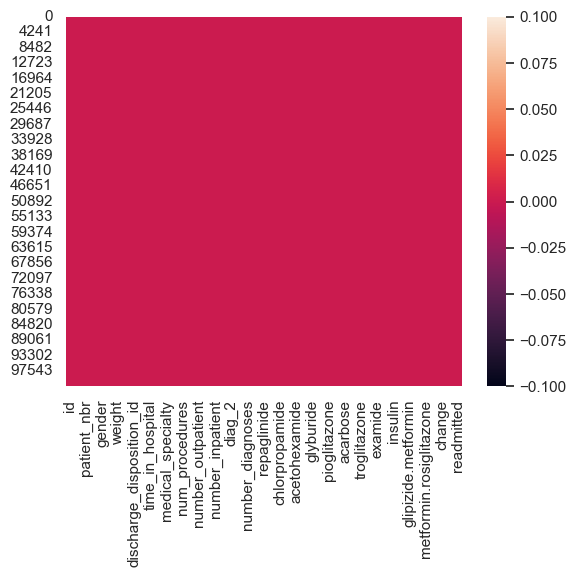

In [55]:
sns.heatmap(data.isnull())              #Make a graphic image to clarify null value

In [56]:
print("Current Number of rows", data.shape[0])              ##Current Number of rows


Current Number of rows 101766


In [57]:
# check Duplication
data.duplicated().sum

<bound method NDFrame._add_numeric_operations.<locals>.sum of 0         False
1         False
2         False
3         False
4         False
          ...  
101761    False
101762    False
101763    False
101764    False
101765    False
Length: 101766, dtype: bool>

In [58]:
# check Rows Duplication

duplicated_rows = sum(data.duplicated())
print("Number of Duplicated rows: ", duplicated_rows)

Number of Duplicated rows:  0


# Exploratory Data Analysis


In [59]:
#descriptive statistics
data.describe()

,id,encounter_id,patient_nbr,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
count,101766.000000,1.017660e+05,1.017660e+05,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000
mean,50883.500000,1.652016e+08,5.433040e+07,2.024006,3.715642,5.754437,4.395987,43.095641,1.339730,16.021844,0.369357,0.197836,0.635566,7.422607
std,29377.458084,1.026403e+08,3.869636e+07,1.445403,5.280166,4.064081,2.985108,19.674362,1.705807,8.127566,1.267265,0.930472,1.262863,1.933600
min,1.000000,1.252200e+04,1.350000e+02,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,25442.250000,8.496119e+07,2.341322e+07,1.000000,1.000000,1.000000,2.000000,31.000000,0.000000,10.000000,0.000000,0.000000,0.000000,6.000000
50%,50883.500000,1.523890e+08,4.550514e+07,1.000000,1.000000,7.000000,4.000000,44.000000,1.000000,15.000000,0.000000,0.000000,0.000000,8.000000
75%,76324.750000,2.302709e+08,8.754595e+07,3.000000,4.000000,7.000000,6.000000,57.000000,2.000000,20.000000,0.000000,0.000000,1.000000,9.000000
max,101766.000000,4.438672e+08,1.895026e+08,8.000000,28.000000,25.000000,14.000000,132.000000,6.000000,81.000000,42.000000,76.000000,21.000000,16.000000


In [60]:
# We Will Import modules Converts ==> "object" =TO=> "numeric"

from sklearn.preprocessing import LabelEncoder
lab = LabelEncoder()     

obj =data.select_dtypes(include = 'object')
non_obj = data.select_dtypes(exclude='object')
                                    
for i in range(0 ,obj.shape[1]):
    obj.iloc[:,i]=lab.fit_transform(obj.iloc[:,i])
    
data2 = pd.concat([obj,non_obj],axis = 1)
data2 

,race,gender,age,weight,payer_code,medical_specialty,diag_1,diag_2,diag_3,metformin,...,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
0,3,0,0,1,0,38,124,650,670,1,...,25,1,1,41,0,1,0,0,0,1
1,3,0,1,1,0,0,143,79,121,1,...,1,7,3,59,0,18,0,0,0,9
2,1,0,2,1,0,0,454,78,767,1,...,1,7,2,11,5,13,2,0,1,6
3,3,1,3,1,0,0,554,97,248,1,...,1,7,2,44,1,16,0,0,0,7
4,3,1,4,1,0,0,54,24,86,1,...,1,7,1,51,0,8,0,0,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,1,1,7,1,8,0,102,148,295,2,...,3,7,3,51,0,16,0,0,0,9
101762,1,0,8,1,8,0,381,133,536,1,...,4,5,5,33,3,18,0,0,1,9
101763,3,1,7,1,8,0,236,389,159,2,...,1,7,1,53,0,9,1,0,0,13
101764,3,0,8,1,8,63,693,142,668,1,...,3,7,10,45,2,21,0,0,1,9


# Q1:Give details about columns by using Histgram

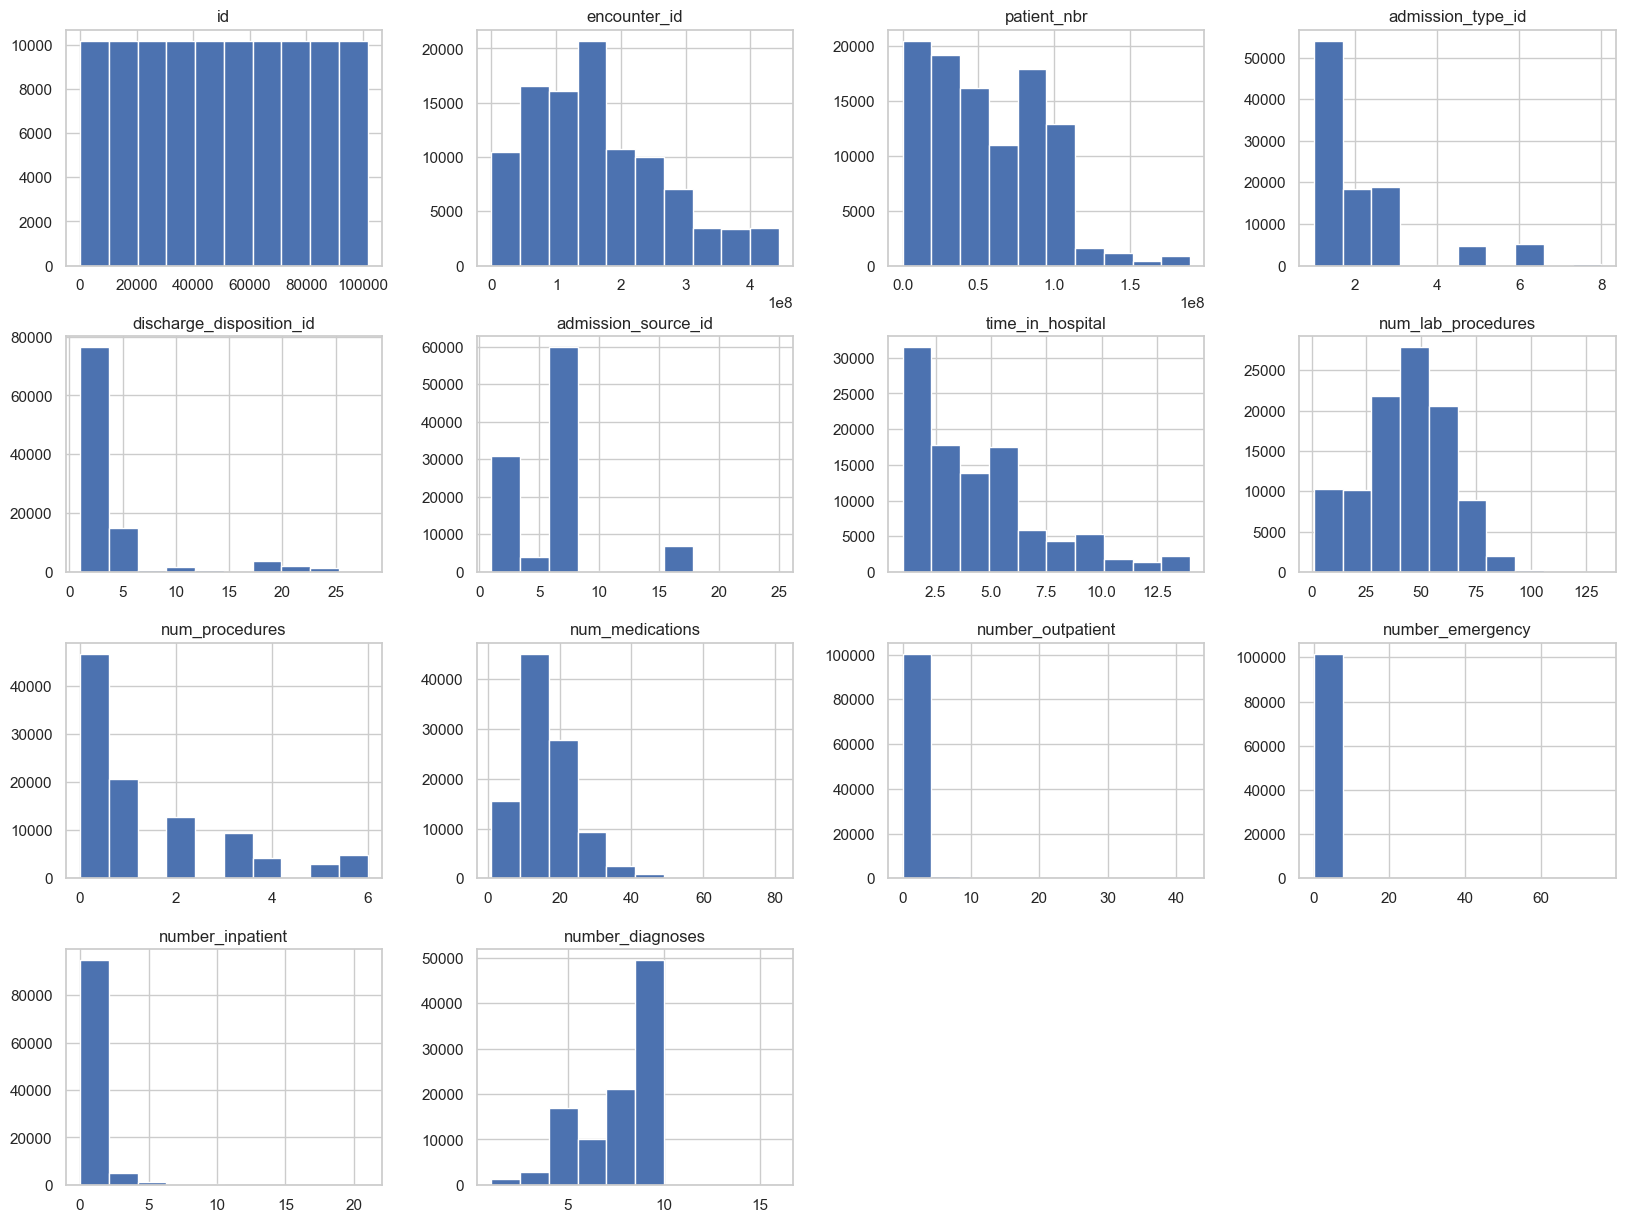

In [61]:
data.hist(figsize=(20,15))   #Give details about columns by using Histgram
plt.show()

# Q2: Analysis of the number of men and women by countplot

<Axes: xlabel='gender', ylabel='count'>

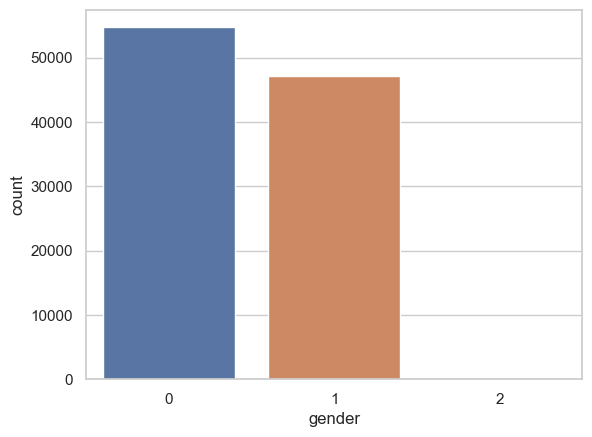

In [62]:
sns.countplot(x = "gender" , data = data2)  

# Q3: Analysis of statistical data for insulin

In [63]:
data['insulin'].value_counts()      

insulin
No        47383
Steady    30849
Down      12218
Up        11316
Name: count, dtype: int64

# Q4: Analysis the age by boxplot

<Axes: xlabel='age'>

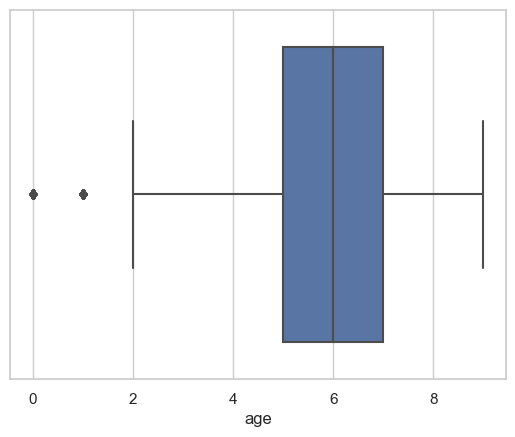

In [64]:
sns.boxplot(x =data2.age)


# Q5: Discover relationships between columns and each other

<Axes: >

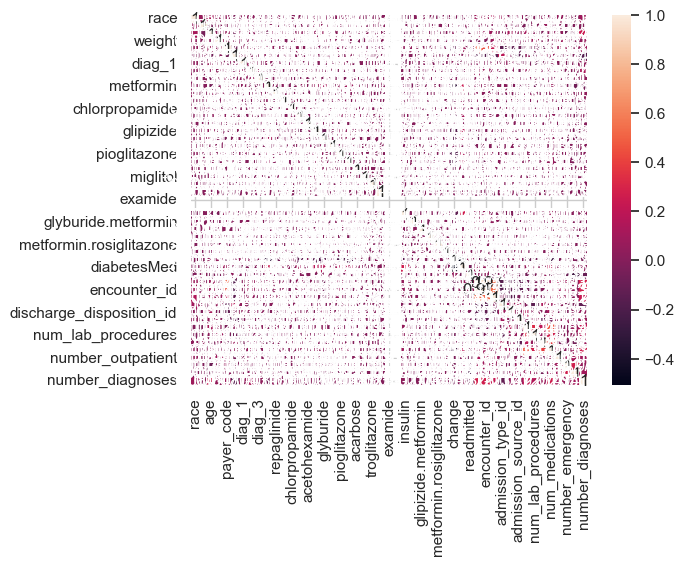

In [65]:
sns.heatmap(data2.corr(), annot = True)     

# Q6:Statistical for race

<Figure size 2000x500 with 0 Axes>

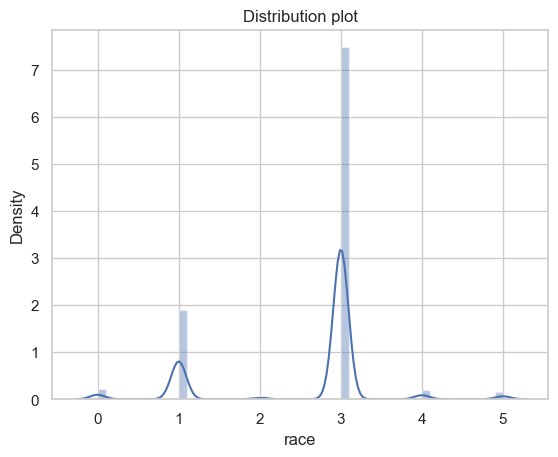

In [66]:
plt.figure(figsize= (20,5))

plt.subplots()
plt.title('Distribution plot')    
sns.distplot(data2['race'])

plt.show()

# Q7:Statistical for race


In [67]:
data.weight.value_counts()

weight
?            98569
[75-100)      1336
[50-75)        897
[100-125)      625
[125-150)      145
[25-50)         97
[0-25)          48
[150-175)       35
[175-200)       11
>200             3
Name: count, dtype: int64

# Q8 Making a statistic for diabetesMed

<Axes: ylabel='count'>

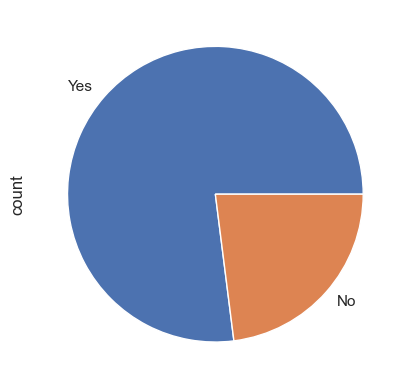

In [68]:
data.diabetesMed.value_counts().plot.pie()

# Q9: Explore from any country by graph histplot

<Axes: xlabel='race', ylabel='Count'>

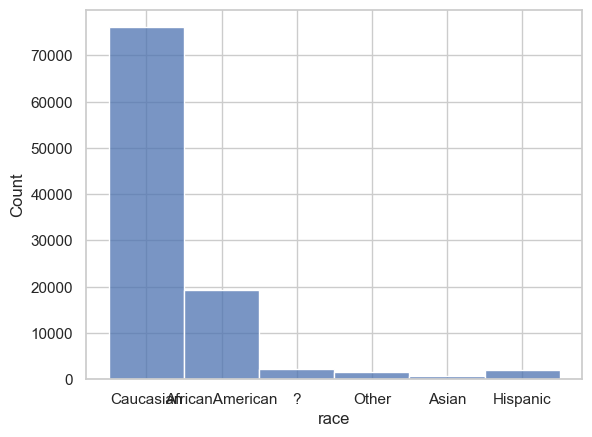

In [69]:
sns.histplot(data.race)

# Q10:Explore readmitted by graph histplot

<Axes: xlabel='readmitted', ylabel='Count'>

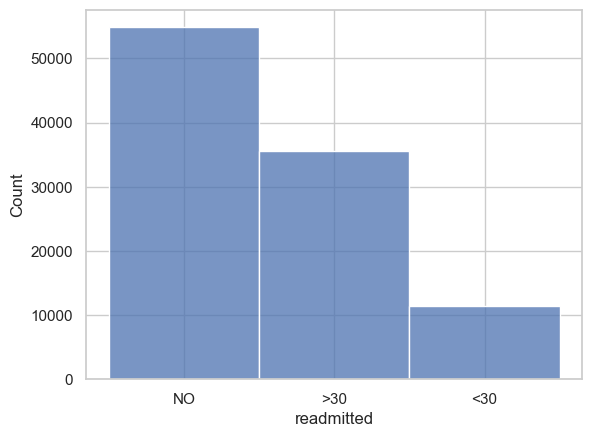

In [70]:
sns.histplot(data.readmitted)

# Q11: Analysis the age by bargraph

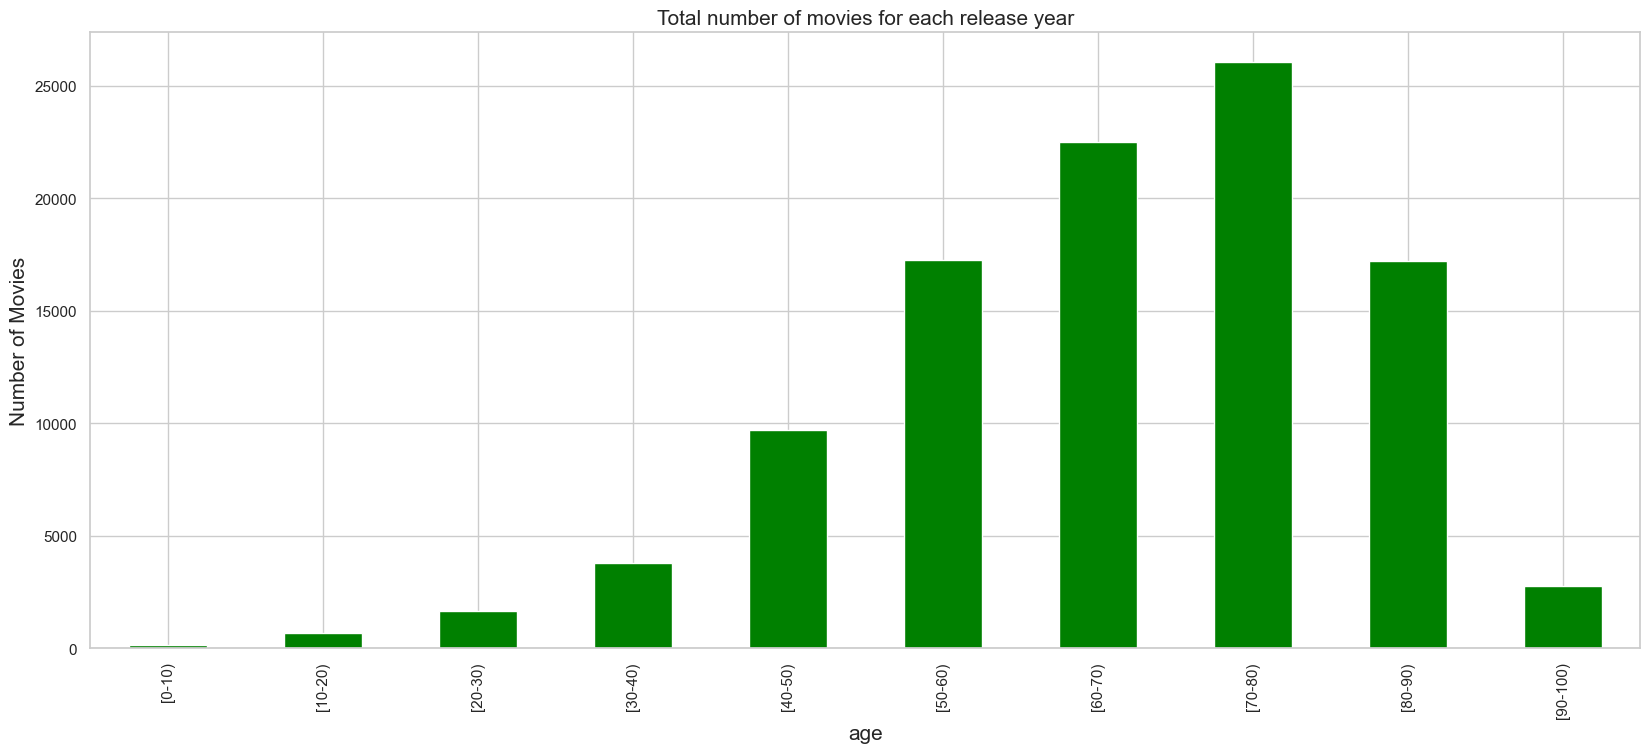

In [71]:
data['age'].value_counts().sort_index().plot(kind='bar',figsize=(20,8), color = 'green');
plt.xlabel('age', fontsize=15)
plt.ylabel('Number of Movies', fontsize=15)
plt.title('Total number of movies for each release year', fontsize=15)
#displays the plot
plt.show()

# Q12: check the relationshib between patient_nbr , number_emergency

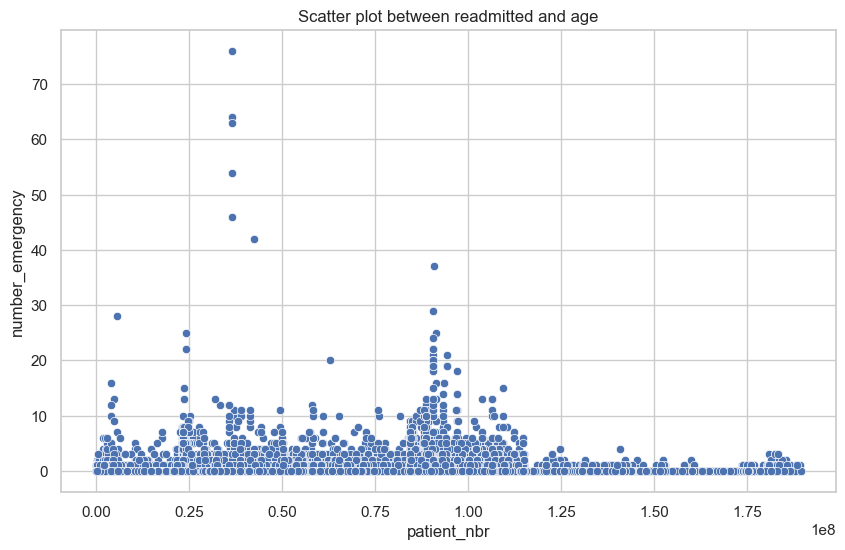

In [72]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='patient_nbr', y='number_emergency', data=data2)
plt.title('Scatter plot between readmitted and age')
plt.show()

# Q13: Information about the (admission_type_id)and (discharge_disposition_id)


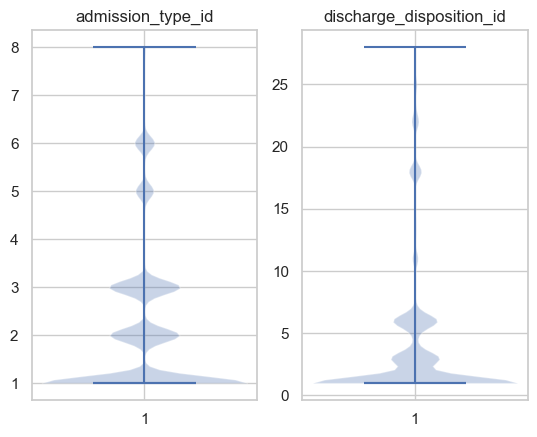

In [73]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2);

# Plot violin plot on axes 1
ax1.violinplot(data2.admission_type_id, showmedians=True)
ax1.set_title('admission_type_id')
ax1.set_xticks([1])

# Plot violin plot on axes 2
ax2.violinplot(data2.discharge_disposition_id, showmedians=True)
ax2.set_title('discharge_disposition_id')
ax2.set_xticks([1])


plt.show()

# Q14: Make an analysis of people's races By Using plot.pie


<Axes: ylabel='count'>

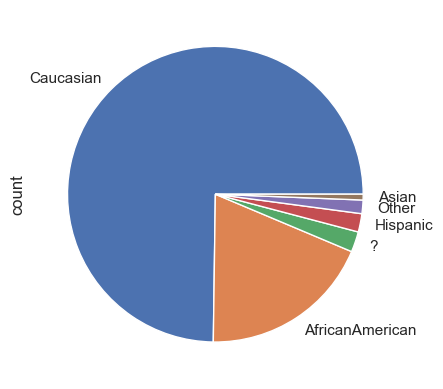

In [74]:
data.race.value_counts().plot.pie()


# Q15 : What is the rate of change in diabetesMed?


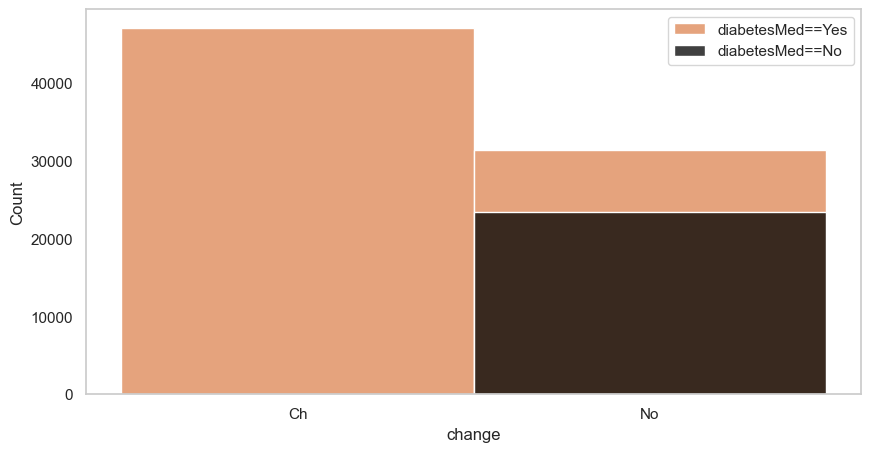

In [75]:
for i in range(1):
    fig, ax = plt.subplots(figsize=(10,5))
    sns.histplot(data['change'][data['diabetesMed']=='Yes'], label='diabetesMed==Yes', ax=ax, color='C1',bins=30)
    sns.histplot(data['change'][data['diabetesMed']=='No'], label='diabetesMed==No', ax=ax, color='black',bins=30)
    ax.legend()
    ax.grid()


# Q16: What are the cases of diabetesMed By Using Histogram ?


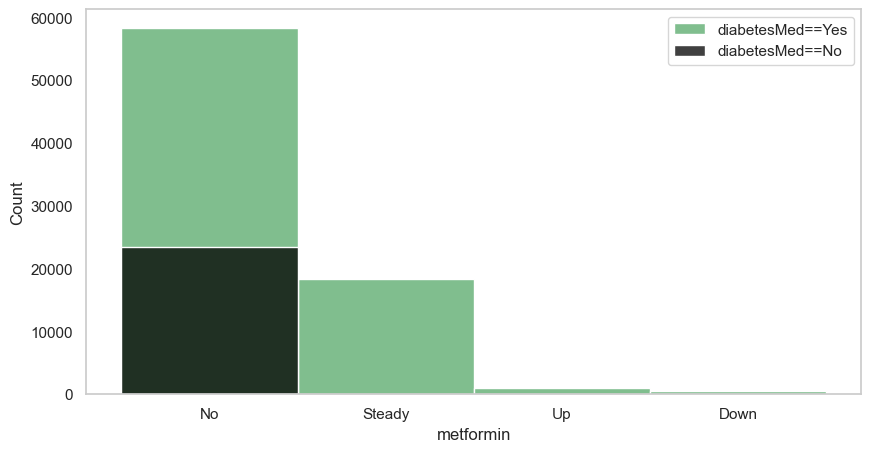

In [76]:
for i in range(1):
    fig, ax = plt.subplots(figsize=(10,5))
    sns.histplot(data['metformin'][data['diabetesMed']=='Yes'], label='diabetesMed==Yes', ax=ax, color='C2',bins=30)
    sns.histplot(data['metformin'][data['diabetesMed']=='No'], label='diabetesMed==No', ax=ax, color='black',bins=30)
    ax.legend()
    ax.grid()


# Q17:Above shows that there are more patients that take their medication than those who do not take it



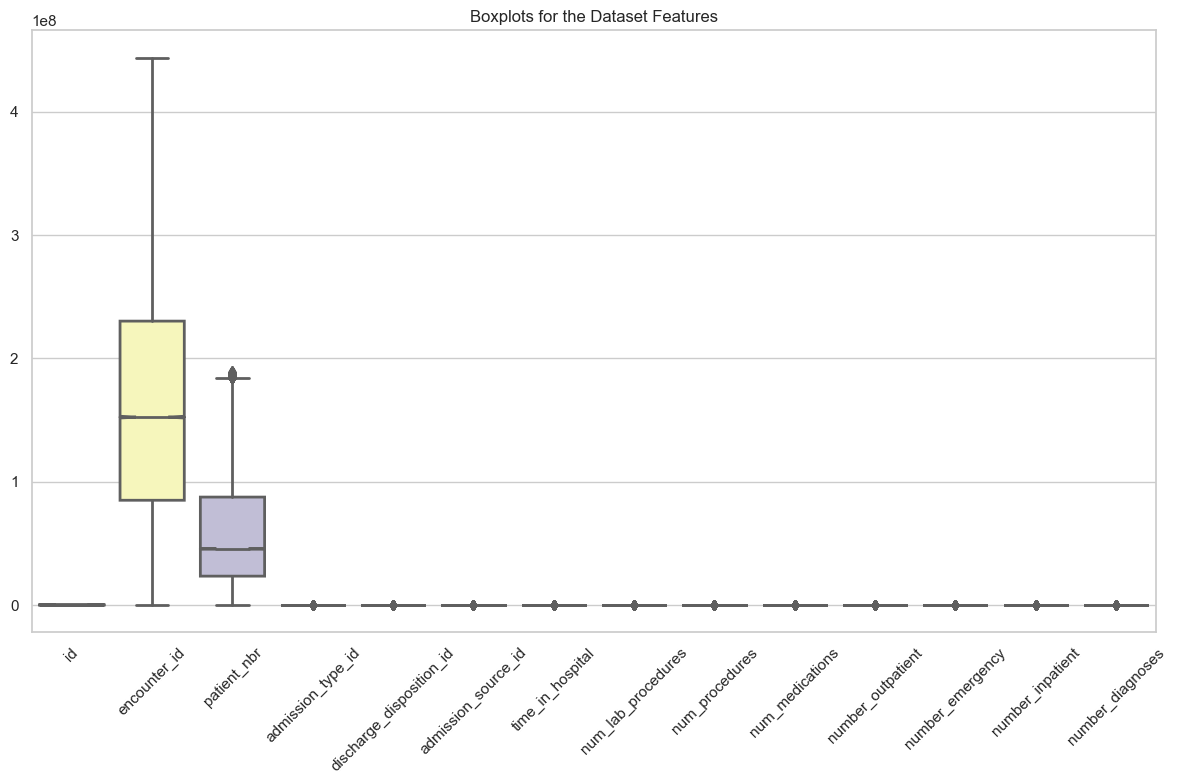

In [77]:
#Boxplots for each feature
sns.set(style="whitegrid")
plt.figure(figsize=(12,8))
sns.boxplot(data, palette="Set3",linewidth=2,fliersize=5,notch=True)
plt.title("Boxplots for the Dataset Features")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Q18: analysis of diabetesMed


In [78]:
 data.groupby(["diabetesMed"]).size().sort_values(ascending=False)


diabetesMed
Yes    78363
No     23403
dtype: int64

# Model

# #Machine_learning

In [79]:
X = data2.drop('readmitted', axis=1)

In [80]:
y = data.readmitted

## Splitting Data


In [81]:
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.25)

In [82]:
model1=LogisticRegression()
model1.fit(X_train, y_train)

LogisticRegression()

In [83]:
pre = model1.predict(X_test)       ###

## Evaluating the Model

In [84]:
accuracy_score(pre, y_test)        ###

0.540877289521264

In [85]:
confusion_matrix(pre, y_test)      ###

array([[    0,     0,     0],
       [  367,  1228,  1191],
       [ 2546,  7577, 12533]], dtype=int64)

<Axes: >

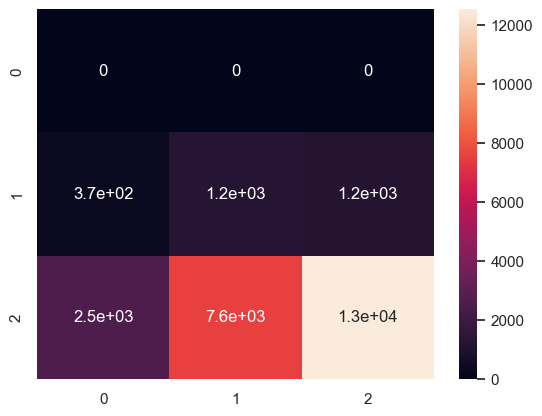

In [86]:
sns.heatmap(confusion_matrix(pre, y_test), annot=True)

## Building Decision Tree Model

In [87]:
clf = DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

## Evaluating the Model

In [88]:

# clf = clf.fit(X_train, y_train)
print("accuracy : ",metrics.accuracy_score(y_test, y_pred))

accuracy :  0.48423866048266645
